# Modelo de clasificación de imágenes basado en una red neuronal profunda

Se pide utilizar el dataset que viene precargado en la librería Keras: [CIFAR10](https://keras.io/api/datasets/cifar10/)


1. Importa los módulos necesarios de la librería Keras. Sugerencia:


```
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense
```



In [2]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2. Importa el dataset CIFAR10 de Keras, en un conjunto de datos de entrenamiento y un conjunto de datos para test. Sugerencia:


```
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```



In [3]:
# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


3. Explora los datos, especialmente, las dimensiones del dataset. Aplica normalización a los datos de entrada y la técnica one-hot encoding a los de salida.

*Sugerencia para normalizar:*


```
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
```
*Sugerencia de aplicación one-hot encoding para categorizar etiquetas:*


```
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
```




In [4]:
print ("Entrenamiento: ",x_train.shape,y_train.shape)
print ("Prueba: ",x_test.shape,y_test.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print ("Entrenamiento normalizado y codificado: ",x_train.shape,y_train.shape)
print ("Prueba normalizado y codificado: ",x_test.shape,y_test.shape)


Entrenamiento:  (50000, 32, 32, 3) (50000, 1)
Prueba:  (10000, 32, 32, 3) (10000, 1)
Entrenamiento normalizado y codificado:  (50000, 32, 32, 3) (50000, 10)
Prueba normalizado y codificado:  (10000, 32, 32, 3) (10000, 10)


4. Crea un modelo basado en redes neuronales profundas que tenga más de una capa de tipo Dense (Keras). Si es necesario, usa la capa Flatten al principio. Prueba un primer modelo lo más sencillo posible.

In [8]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Capa Flatten para aplanar la entrada
    Dense(512, activation='relu'),     # Primera capa Dense con 512 neuronas y activación ReLU
    Dense(256, activation='relu'),     # Segunda capa Dense con 256 neuronas y activación ReLU
    Dense(10, activation='softmax')    # Capa de salida con 10 neuronas (una para cada clase) y activación Softmax
])



5. Configura el entrenamiento utilizando la función compile, con la función loss = 'categorical_crossentropy' y el optimizador Adam. Utiliza la función fit para entrenar el modelo, inicialmente, con 20 epochs.

In [10]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/20
782/782 [==============================] - 27s 33ms/step - loss: 27.1292 - accuracy: 0.2200 - val_loss: 3.2760 - val_accuracy: 0.2396
Epoch 2/20
782/782 [==============================] - 22s 28ms/step - loss: 2.2995 - accuracy: 0.2837 - val_loss: 2.1436 - val_accuracy: 0.2983
Epoch 3/20
782/782 [==============================] - 23s 29ms/step - loss: 1.9456 - accuracy: 0.3183 - val_loss: 1.9150 - val_accuracy: 0.3227
Epoch 4/20
782/782 [==============================] - 22s 27ms/step - loss: 1.9346 - accuracy: 0.3218 - val_loss: 2.0291 - val_accuracy: 0.2971
Epoch 5/20
782/782 [==============================] - 22s 29ms/step - loss: 2.0087 - accuracy: 0.3057 - val_loss: 2.0859 - val_accuracy: 0.2650
Epoch 6/20
782/782 [==============================] - 22s 28ms/step - loss: 2.0470 - accuracy: 0.2782 - val_loss: 2.1143 - val_accuracy: 0.2109
Epoch 7/20
782/782 [==============================] - 23s 29ms/step - loss: 2.0542 - accuracy: 0.2292 - val_loss: 2.2232 - val_accuracy

6. Crea un nuevo modelo con más capas y mayor número de neuronas. Entrénalo utilizando un número mayor de epochs y analiza el resultado. ¿Has conseguido mejorar la precisión? haz varias pruebas y quédate con el modelo que mejores resultados da.

In [11]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Capa Flatten para aplanar la entrada
    Dense(512, activation='relu'),     # Primera capa Dense con 512 neuronas y activación ReLU
    Dense(256, activation='relu'),     # Segunda capa Dense con 256 neuronas y activación ReLU
    Dense(256, activation='relu'),     # Tercera capa Dense con 256 neuronas y activación ReLU
    Dense(10, activation='softmax')    # Capa de salida con 10 neuronas (una para cada clase) y activación Softmax
])
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/25
782/782 [==============================] - 24s 30ms/step - loss: 19.6214 - accuracy: 0.2293 - val_loss: 2.1135 - val_accuracy: 0.2874
Epoch 2/25
782/782 [==============================] - 24s 30ms/step - loss: 2.0882 - accuracy: 0.2982 - val_loss: 1.8976 - val_accuracy: 0.3472
Epoch 3/25
782/782 [==============================] - 22s 29ms/step - loss: 2.0375 - accuracy: 0.3050 - val_loss: 1.8574 - val_accuracy: 0.3413
Epoch 4/25
782/782 [==============================] - 23s 30ms/step - loss: 2.0510 - accuracy: 0.2789 - val_loss: 2.1469 - val_accuracy: 0.2269
Epoch 5/25
782/782 [==============================] - 23s 30ms/step - loss: 1.9725 - accuracy: 0.2800 - val_loss: 1.9910 - val_accuracy: 0.2619
Epoch 6/25
782/782 [==============================] - 23s 30ms/step - loss: 1.9855 - accuracy: 0.2651 - val_loss: 1.9418 - val_accuracy: 0.2774
Epoch 7/25
782/782 [==============================] - 23s 29ms/step - loss: 1.9375 - accuracy: 0.2774 - val_loss: 1.9187 - val_accuracy

7. Utiliza el método evaluate para ver la precisión que se alcanzaría con datos nuevos, aplicándolo al conjunto de datos de test. ¿Es muy diferente a la precisión alcanzada en el entrenamiento?

In [23]:

# Definir el modelo
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo con un optimizador Adam y una tasa de aprendizaje reducida
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Pérdida en el conjunto de prueba:", test_loss)
print("Precisión en el conjunto de prueba:", test_accuracy)


313/313 [==============================] - 4s 12ms/step - loss: 83.8209 - accuracy: 0.0894
Pérdida en el conjunto de prueba: 83.82089233398438
Precisión en el conjunto de prueba: 0.08940000087022781


8. Explora de forma visual la precisión que se consigue, representando las primeras 25 imágenes del conjunto de datos de test, y comparando la etiqueta real con la de la predicción. Aquí tienes una posible forma de hacerlo (recuerda poner el nombre de tu modelo a la hora de aplicar el método predict):


```
predictions = model.predict(X_test)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)
```



313/313 [==============================] - 7s 20ms/step


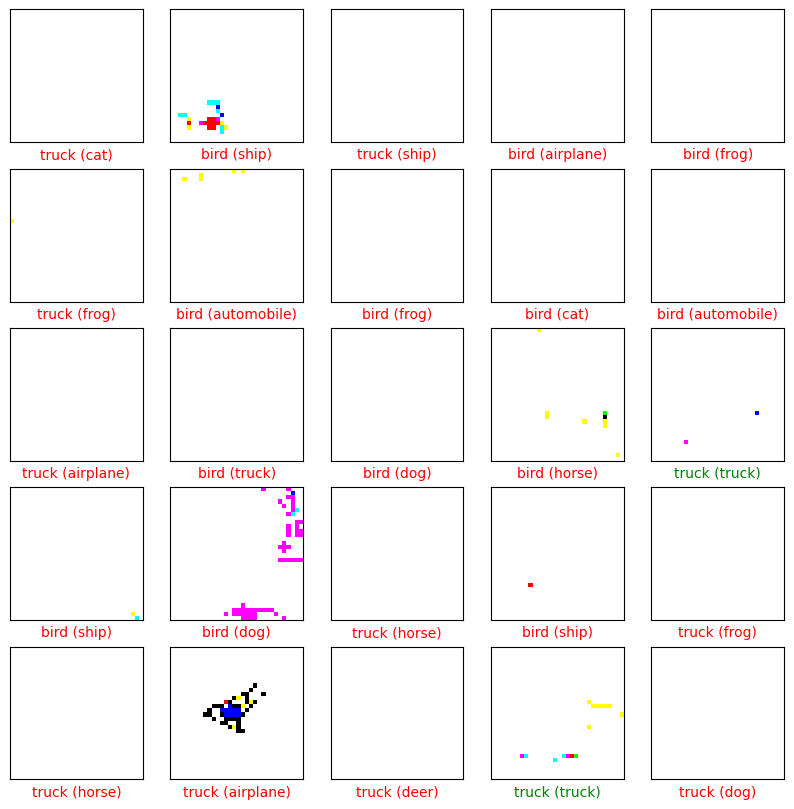

In [25]:
import matplotlib.pyplot as plt

# Definir el modelo
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(x_test)

# Nombres de las clases
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Visualizar algunas imágenes con sus etiquetas predichas
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)

plt.show()

